In [1]:
import numpy as np
import root_numpy as rn
import pandas as pd
import math
from matplotlib import pyplot as plt
%matplotlib inline

import matplotlib

matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{xfrac,fontspec,unicode-math}"]
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{mathastext}"]

font = 22   
legendfont = 18
matplotlib.rc('font',weight='bold')
matplotlib.rc('font',size=font)
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


## Here we will plot the cross sectional variations over 1000 universes

In [5]:
stage = 'pi0'
stage = 'singleshower'

f = rn.root2array('Files/Flux_%s_ana.root'%stage,treename='univ')
df = pd.DataFrame(f)

label_v = ["FluxUnisim", "$K^+$", "$K^-$", "$K^0$", "$\pi^+$","$\pi^-$"]
name_v = ["FluxUnisim", "K+","K-","K0","pi+","pi-"]

Total combined error is 14.49


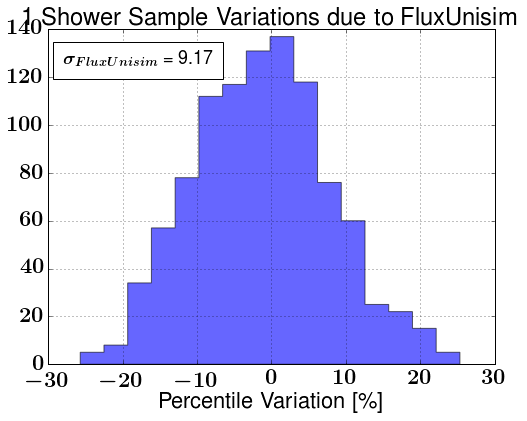

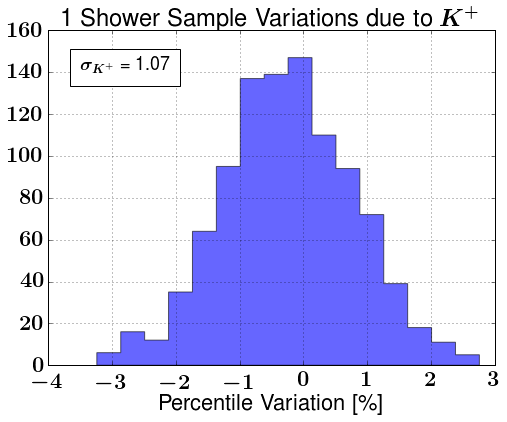

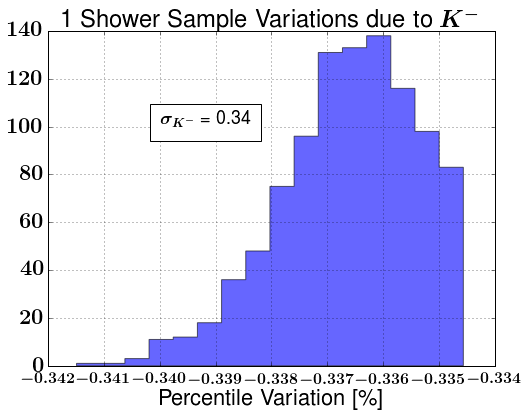

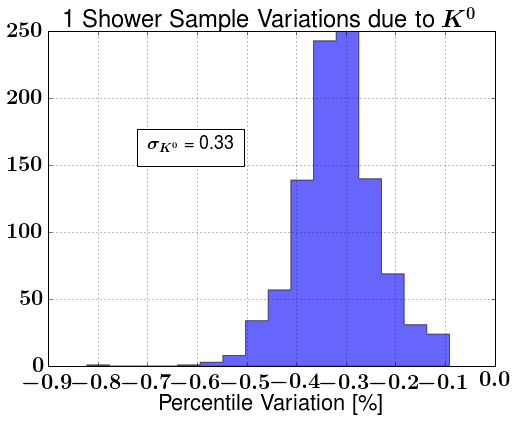

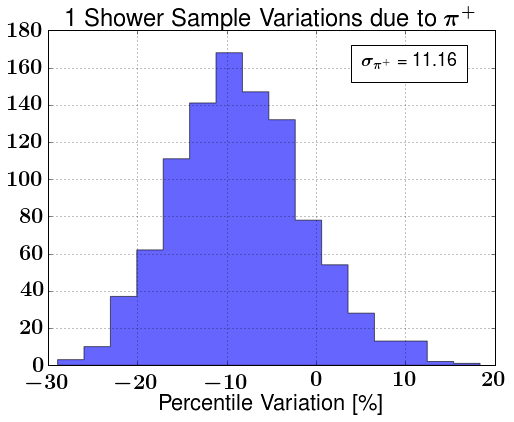

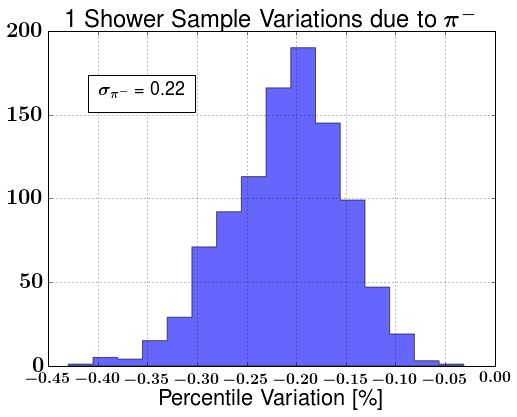

In [6]:
### Cross Section Variations
n_weights = 6
n_events = 1000 # this should read number of universes
nbins = 16
xmin = 0; xmax = 7

w_v = []
p_v = []

for i in xrange(n_weights):
    #print df.xsec_v.values[0][i]
    for j in xrange(n_events):
        w_v.append(df.xsec_v.values[0][i][j])  
        p_v.append(df.perc_v.values[0][i][j])  

quad_sum = 0

for i in xrange(n_weights):
    
    weights_u = w_v     [i * n_events: (i+1) * n_events]        
    perc_u    = (p_v     [i * n_events: (i+1) * n_events])        

    #if i == 2:
    #    print perc_u
    #print '\nWeight ', name_v[i]
    #print 'Lower: ', np.sqrt(np.mean(temp**2)), ', Upper : ', np.sqrt(np.mean(temp**2))        
    #print 'Lower: ', np.sqrt(np.mean(abs(temp[temp<0])**2)), ', Upper : ', np.sqrt(np.mean(abs(temp[temp>=0])**2))        
    temp = np.array(perc_u)    
    sig = np.sqrt(np.mean(temp**2))
    
    quad_sum += sig*sig
    
    #xmin_v = [-30,-3,-0.04,-0.6,-30,-0.15]
    #xmax_v = [30,3,0.004,0.6,20,0.2]
    textx_v = [-28,-2.6,-0.033,-0.6,5,.1]
    texty_v = [120,140,120,160,160,130]
    
    if stage == 'singleshower':
        textx_v = [-28,-3.5,-0.34,-0.7,5,-0.4]
        texty_v = [125,140,100,160,160,160]
    
    text_label_v = ['FluxUnisim','K^+','K^-','K^0','\pi^+','\pi^-']
    #print text_label_v[i], sig
    
    fig,ax = plt.subplots(figsize=(8,6))    
    c,_,_ = plt.hist(perc_u,bins=nbins,histtype='stepfilled',alpha=0.6)#,range=(xmin_v[i],xmax_v[i]))
    plt.grid(True)
    
    plt.text(textx_v[i],texty_v[i],'$\sigma_{%s}$ = %.2f%%'%(text_label_v[i],sig),fontsize=18,bbox={'facecolor':'white','pad':10})
    
    if i == 2 or i == 5:
        plt.xticks(fontsize=16)
    plt.xlabel('Percentile Variation [\%]',fontsize=font,weight='bold')
    plt.title('2 Shower Sample Variations due to %s'%label_v[i],fontsize=24,weight='bold')

    if stage == 'singleshower':
        plt.title('1 Shower Sample Variations due to %s'%label_v[i],fontsize=24,weight='bold')
    
    plt.savefig('Plots/Flux_perc_var_%s_%s.png'%(stage,name_v[i]))
    
print 'Total combined error is %.2f' % math.sqrt(quad_sum)